## Código para extraer las series de tiempo del Nodo Continuo implementado desde FireBase Realtime Database.

**INSTRUCCIONES:**

Solo Hay que hacer click en > Entorno de ejecución -> Ejecutar todo.

Ejemplo:
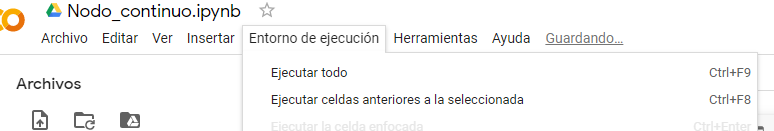

# Conexión a base de datos

In [ ]:
# %% Credenciales, conexión y referencia
% pip install firebase_admin
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
import time
import pandas as pd
from google.colab import files
import requests
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# Para cargar el archivo manualmente descomente la línea files.upload y
# cargue manualmente el el archivo "firebase-adminsdk.json".
# Este archivo puede descargarse desde : 
# https://github.com/niclabs/water-monitoring/blob/master/driffting/RPi-FBase/firebase-adminsdk.json

# files.upload()

# Url de la clave de cuenta de servicio:
url = 'https://raw.githubusercontent.com/niclabs/water-monitoring/master/driffting/RPi-FBase/firebase-adminsdk.json'
cert = requests.get(url).json()

# Fetch the service account key JSON file contents
cred = credentials.Certificate(cert)
# Initialize the app with a service account, granting admin privileges
try: 
  firebase_admin.initialize_app(cred, {
      'databaseURL': 'https://water-monitoring-46b05-default-rtdb.firebaseio.com/'
    })
except:
  print('Ya se cargó la DB previamente u ocurrio un error.')

#%% Referencia a la base de datos
ref = db.reference('datalogger/2-push')



# Manejo con Pandas

In [ ]:
# Cargando el dataframe con los datos de la base de datos

db = ref.get()
db_df=pd.DataFrame(data=db).transpose()

db_df['timestamp'] = pd.to_datetime(db_df['timestamp'], unit='s')


db_df.timestamp = db_df.timestamp.dt.tz_localize('UTC').dt.tz_convert('Chile/Continental')
db_df.timestamp = db_df.timestamp.dt.tz_localize(None)
db_df.head()

,channel 1,channel 2,channel 3,channel 4,timestamp,ds18b20_1,ds18b20_2,ds18b20_3
-MRVTIkWAl3G25xfrayK,4.0,306.0,1646.0,734.0,NaT,NaN,NaN,NaN
-MRVTJpG2KjQgo69NS8R,4.0,271.0,1646.0,737.0,NaT,NaN,NaN,NaN
-MRVTKul9BQ92q5hE-GN,4.0,305.0,1646.0,738.0,NaT,NaN,NaN,NaN
-MRVTM-99YcaD23_edG4,4.0,267.0,1646.0,738.0,NaT,NaN,NaN,NaN
-MRVTN4YEuN_IGa4Fvlz,4.0,292.0,1646.0,734.0,NaT,NaN,NaN,NaN


In [ ]:
# Limpieza de datos
db_df.replace(to_replace=['none'], value=np.nan, inplace=True)
db_df.set_index('timestamp', inplace=True)
db_df.dropna()

,channel 1,channel 2,channel 3,channel 4,ds18b20_1,ds18b20_2,ds18b20_3
timestamp,,,,,,,
2021-01-21 23:01:47.872585773,3.0,272.0,302.0,738.0,25.875,26.562,-1.0
2021-01-21 23:01:53.582856417,4.0,295.0,298.0,739.0,25.750,26.562,-1.0
2021-01-21 23:01:58.803559780,3.0,271.0,275.0,740.0,25.812,26.625,-1.0
2021-01-21 23:02:03.958737612,4.0,268.0,271.0,740.0,25.875,26.562,-1.0
2021-01-21 23:02:09.202067137,3.0,297.0,302.0,738.0,25.875,26.562,-1.0
...,...,...,...,...,...,...,...
2021-04-05 12:43:44.855234861,880.0,267.0,268.0,69.0,21.187,22.187,-1.0
2021-04-05 12:44:15.306980133,880.0,265.0,268.0,69.0,21.125,22.250,-1.0
2021-04-05 12:44:45.669110298,881.0,268.0,268.0,69.0,21.125,22.250,-1.0


In [ ]:
db_df.dropna(inplace=True)

In [ ]:
# Se crea el archivo de excel y se solicita guardarlo.

# between_time(start_time, end_time[, …])

last_date = db_df.index[-1]
string_name = "Nodo_exp_Data "+str(last_date)[:-10]+".xlsx"
db_df.to_excel(string_name, sheet_name='raw_data')
files.download(string_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plots y gráficos


In [ ]:
# Plots según rango fecha

hoy = str(datetime.date.today())
fecha_ini = '2021-Apr-05'
fecha_ter = '2021-Apr-05'
rango_fecha = fecha_ini
print("La fecha corresponde desde ", fecha_ini, "hasta ", fecha_ter)


La fecha corresponde desde  2021-Apr-05 hasta  2021-Apr-05


**Últimos 7 días**

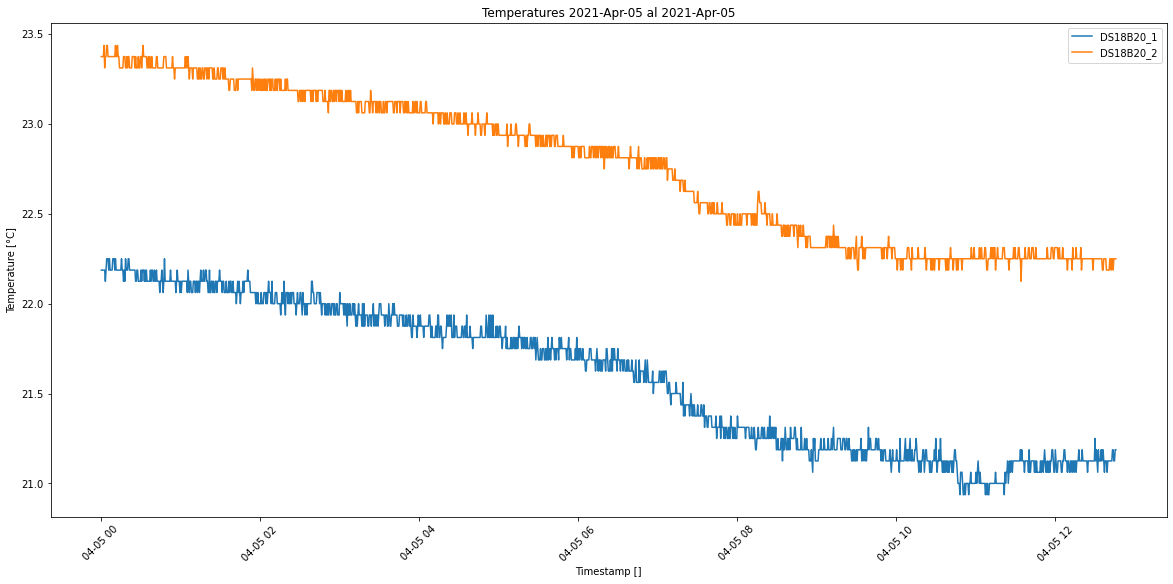

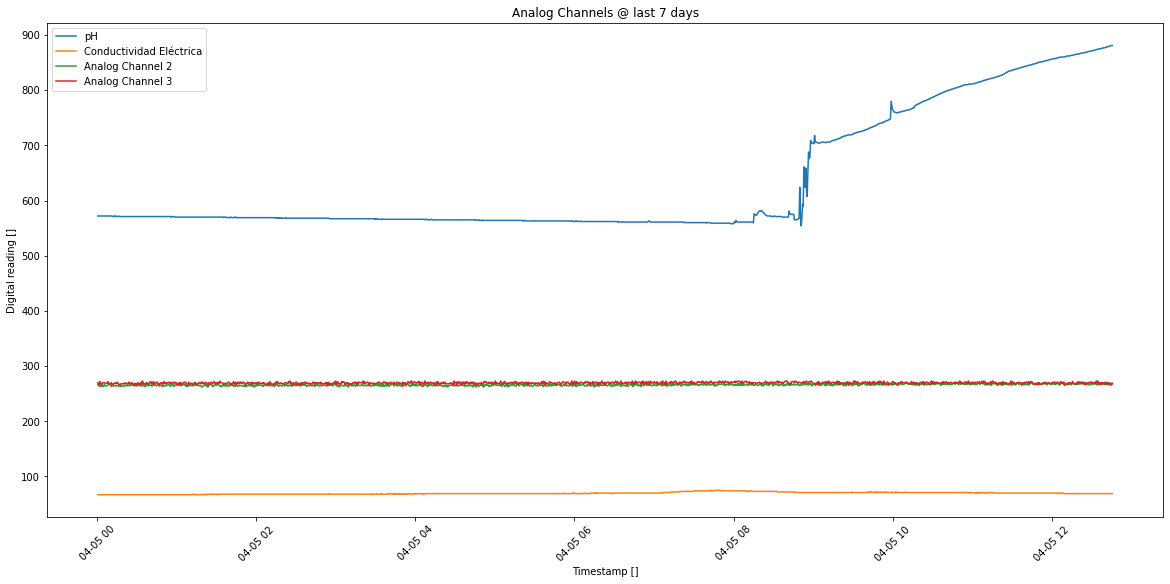

In [ ]:
 


# fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,sharey=True, figsize=(15,30))
# fig.add_subplot(2, 1, 1)
plt.figure(figsize=(20, 20))
plt.subplot(211)#,sharex=True)

plt.title('Temperatures '+ fecha_ini+' al '+fecha_ter)
plt.xticks(rotation = 45)
plt.ylabel('Temperature [°C]')
plt.xlabel('Timestamp []')
# plt.plot(t[-110000::1000],temp1[-110000::1000], label='DS18B20_1')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['ds18b20_1'].values, label='DS18B20_1')
# plt.plot(t[-110000::1000],temp2[-110000::1000],label='DS18B20_2')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['ds18b20_2'].values,label='DS18B20_2')
plt.legend()


# plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
# plt.autofmt_xdate()
# %%


plt.figure(figsize=(20, 20))
plt.subplot(212)#,sharex=True)
plt.title('Analog Channels @ last 7 days')
plt.ylabel('Digital reading []')
plt.xlabel('Timestamp []')
plt.xticks(rotation = 45) 
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 1'].values,label='pH')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 4'].values,label='Conductividad Eléctrica')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 2'].values,label='Analog Channel 2')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 3'].values,label='Analog Channel 3')

plt.legend()


**Data histórica**

In [ ]:
# Plots según rango fecha

hoy = str(datetime.date.today())

# Aquí se ajustan los rangos de fechas a plotear
fecha_ini = '2021-Mar-11'
fecha_ter = hoy

print("La fecha corresponde desde ", fecha_ini, "hasta ", fecha_ter)


La fecha corresponde desde  2021-Mar-11 hasta  2021-04-05


Data Histórica: la fecha corresponde desde  2021-Mar-11  hasta  2021-04-05


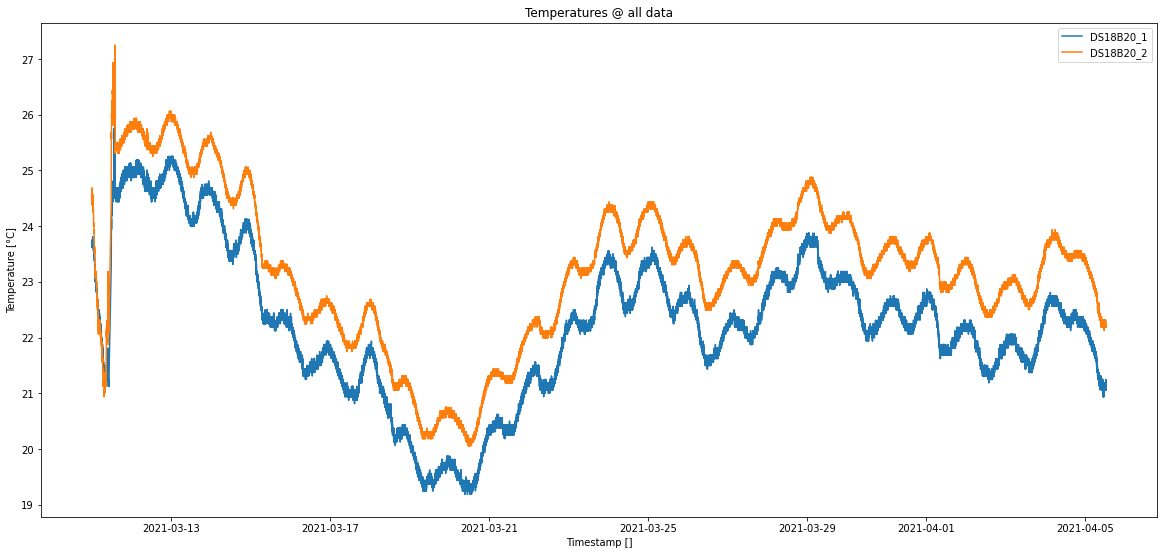

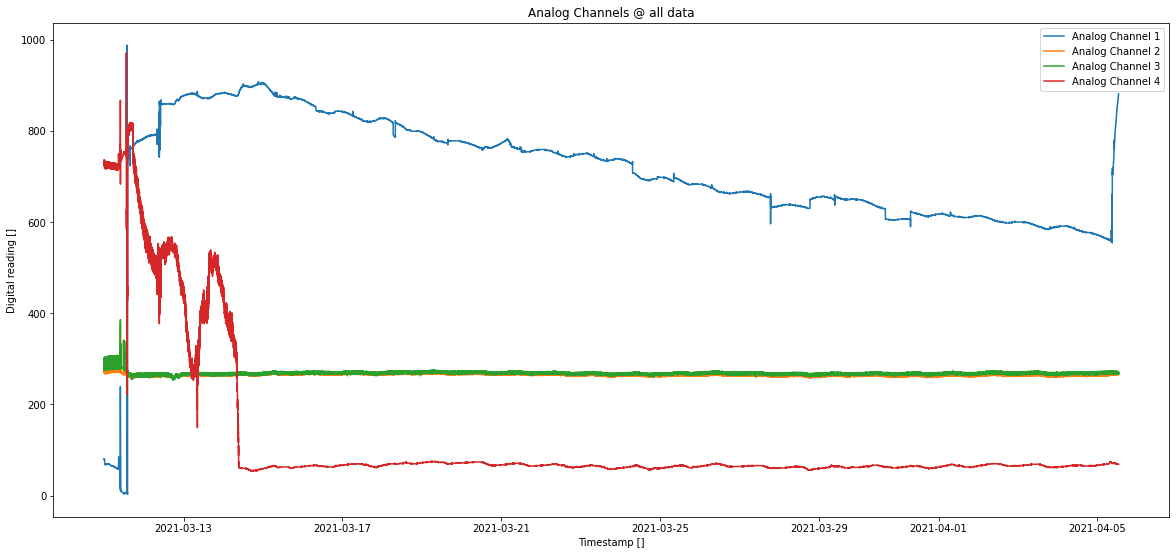

In [ ]:
# primer dato día 21/01 en -> A36299 -
print("Data Histórica: la fecha corresponde desde ", fecha_ini, " hasta ", fecha_ter)

plt.figure(figsize=(20, 20))
plt.subplot(211)#,sharex=True)

plt.title('Temperatures @ all data')
# plt.xticks(rotation = 30)
plt.ylabel('Temperature [°C]')
plt.xlabel('Timestamp []')

# plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 1'].values,label='Analog Channel 1')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['ds18b20_1'].values, label='DS18B20_1')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['ds18b20_2'].values,label='DS18B20_2')
plt.legend()

####################
plt.figure(figsize=(20, 20))
plt.subplot(212)#,sharex=True)
plt.title('Analog Channels @ all data')
plt.ylabel('Digital reading []')
plt.xlabel('Timestamp []')
# plt.xticks(rotation = 30) 
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 1'].values,label='Analog Channel 1')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 2'].values,label='Analog Channel 2')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 3'].values,label='Analog Channel 3')
plt.plot(db_df[fecha_ini:fecha_ter].index.values,db_df[fecha_ini:fecha_ter]['channel 4'].values,label='Analog Channel 4')
plt.legend()

# OLD code

In [ ]:
db_transformada = pd.DataFrame(data=db_df['channel 1'].values,columns=['analog_read'],index=db_df.index)

In [ ]:
db_transformada['voltage'] = db_transformada['analog_read'].values*5/4096
db_transformada['ec'] = (133.42/db_transformada['voltage']*db_transformada['voltage']*db_transformada['voltage']-255.86*db_transformada['voltage']*db_transformada['voltage']+857.93*db_transformada['voltage'])*0.5
# tdsValue = (133.42/voltage*voltage*voltage -255.86*voltage*voltage+857.39*voltage)*0.5
db_transformada

,analog_read,voltage,ec
timestamp,,,
2021-01-21 23:01:47.872585773,3.0,0.003662,1.813500
2021-01-21 23:01:53.582856417,4.0,0.004883,2.417238
2021-01-21 23:01:58.803559780,3.0,0.003662,1.813500
2021-01-21 23:02:03.958737612,4.0,0.004883,2.417238
2021-01-21 23:02:09.202067137,3.0,0.003662,1.813500
...,...,...,...
2021-04-05 12:43:44.855234861,880.0,1.074219,384.839077
2021-04-05 12:44:15.306980133,880.0,1.074219,384.839077
2021-04-05 12:44:45.669110298,881.0,1.075439,385.108449


In [ ]:
db_transformada['11-Mar-2021 13:46':'11-Mar-2021 15:00']

,analog_read,voltage,ec
timestamp,,,
2021-03-11 13:46:21.254872561,845.0,1.031494,375.170876
2021-03-11 13:46:51.624391794,851.0,1.038818,376.861452
2021-03-11 13:47:21.969470978,852.0,1.040039,377.141880
2021-03-11 13:47:52.312937737,852.0,1.040039,377.141880
2021-03-11 13:48:22.744330406,854.0,1.042480,377.701592
...,...,...,...
2021-03-11 15:00:44.661515236,761.0,0.928955,350.061651
2021-03-11 15:00:48.024169445,761.0,0.928955,350.061651
2021-03-11 15:00:51.375858068,761.0,0.928955,350.061651


In [ ]:
voltage=921*2/1000
tdsValue = (133.42/voltage*voltage*voltage -255.86*voltage*voltage+857.39*voltage)*1

In [ ]:
tdsValue

956.94825096

In [ ]:
db_transformada.rename({'0':'analog_read'},inplace=True)

In [ ]:
92

92

In [ ]:
db_df['channel 1'].values

array([  3.,   4.,   3., ..., 881., 881., 881.])

In [ ]:
db_transformada

,analog_read,voltage,ec
timestamp,,,
2021-01-21 23:01:47.872585773,3.0,0.003662,1.813500
2021-01-21 23:01:53.582856417,4.0,0.004883,2.417238
2021-01-21 23:01:58.803559780,3.0,0.003662,1.813500
2021-01-21 23:02:03.958737612,4.0,0.004883,2.417238
2021-01-21 23:02:09.202067137,3.0,0.003662,1.813500
...,...,...,...
2021-04-05 12:43:44.855234861,880.0,1.074219,384.839077
2021-04-05 12:44:15.306980133,880.0,1.074219,384.839077
2021-04-05 12:44:45.669110298,881.0,1.075439,385.108449


In [ ]:
import math
import sys
import time
from grove.adc import ADC
 
class GroveTDS:
 
    def __init__(self, channel):
        self.channel = channel
        self.adc = ADC()
 
    @property
    def TDS(self):
        value = self.adc.read(self.channel)
        if value != 0:
            voltage = value*5/1024.0
            tdsValue = (133.42/voltage*voltage*voltage-255.86*voltage*voltage+857.39*voltage)*0.5
            return tdsValue
        else:
            return 0
 
Grove = GroveTDS
 
def main():
    if len(sys.argv) < 2:
        print('Usage: {} adc_channel'.format(sys.argv[0]))
        sys.exit(1)
 
    sensor = GroveTDS(int(sys.argv[1]))
    print('Detecting TDS...')
 
    while True:
        print('TDS Value: {0}'.format(sensor.TDS))
        time.sleep(1)
 
if __name__ == '__main__':
    main()

ModuleNotFoundError: ignored